In [55]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d

In [56]:
import riskModel as model

In [142]:
theta0 = np.linspace(0.001, 1.99*np.pi, 500)

1.53837832075331

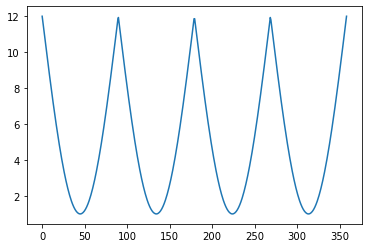

In [150]:
plt.plot(theta0*180/np.pi, model.value_function_ori(model.stim_grid, type = "prior"))
model.value_function_ori((54./180.)*np.pi, type = "prior")

In [58]:
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[0, ...])
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[50, ...])
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[99, ...])

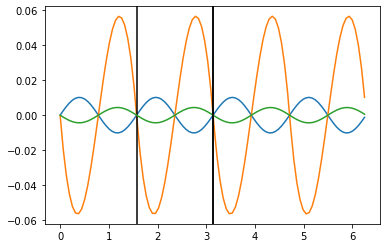

In [59]:
E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.5, 0.01)
plt.plot(theta0, theta0 - E_theta_given_theta0)

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.01, 0.05)
plt.plot(theta0, theta0 - E_theta_given_theta0)
plt.axvline(np.pi, c='k')
plt.axvline(0.5*np.pi, c='k')


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.75, 0.05)
plt.plot(theta0, theta0 - E_theta_given_theta0)
plt.axvline(np.pi, c='k')

In [60]:
sigma_stim = 0.02*np.pi
sigma_rep = 0.01

In [61]:
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim, sigma_rep))[0, ...])

In [62]:
safe_value, safe_prob = model.safe_value_dist((61./180.)*np.pi, sigma_stim, sigma_rep , type = "prior", bins=100)

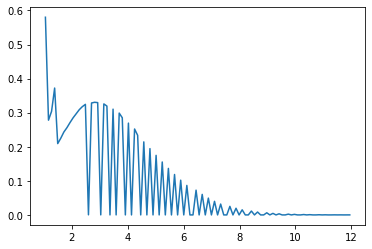

In [63]:
safe_value

plt.plot(safe_value,safe_prob[0,:])

In [64]:
risky_value, risky_prob = model.risky_value_dist((61.0/180.)*np.pi, sigma_stim, sigma_rep , risk_prob = 0.75, type = "prior", bins=100) 

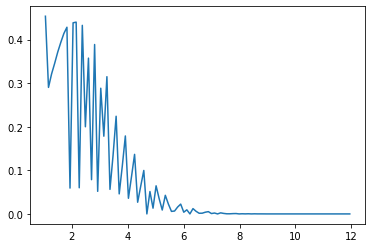

In [65]:
plt.plot(risky_value,risky_prob[0,:])

In [66]:
model.diff_dist(safe_value, risky_prob, safe_prob)

array([[0.32321954]])

# Prior

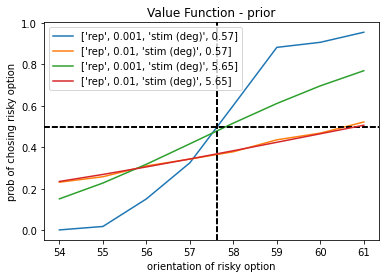

In [200]:
rangePrior1 = np.linspace(54./180., 61./180., 8)*np.pi
rangePrior2 = np.linspace(61./180., 68./180., 8)*np.pi
rangePrior3 = np.linspace(68./180., 78./180., 11)*np.pi
rangePrior4 = np.linspace(78./180., 88./180., 11)*np.pi

rangeOri = rangePrior1


sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_list = [0.001, 0.01]
risk_prob = 0.75
type = "prior"

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - prior")
    
    

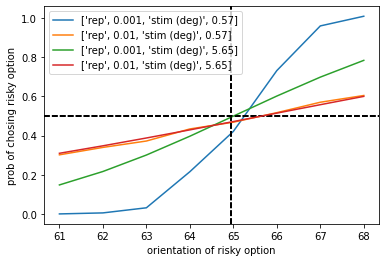

In [201]:
rangeOri = rangePrior2

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")


In [202]:
rangeOri = rangePrior3
risk_prob = 0.75
safeVal = model.value_function_ori(rangeOri[0], type = "prior")
riskyVal = risk_prob*model.value_function_ori(rangeOri, type = "prior")
risky_ori = interp1d(riskyVal, rangeOri)

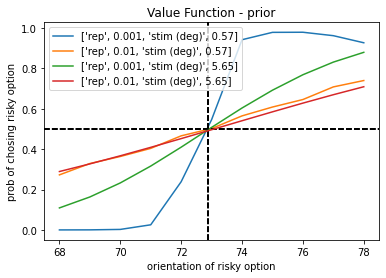

In [203]:
rangeOri = rangePrior3


for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - prior")

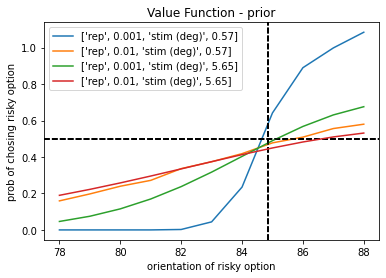

In [204]:
rangeOri = rangePrior4

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - prior")
        

# Linear Prior

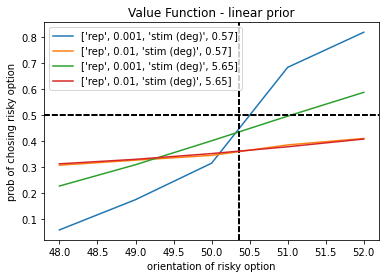

In [205]:
rangeLinear1 = np.linspace(48./180., 52./180., 5)*np.pi
rangeLinear2 = np.linspace(52./180., 59./180., 8)*np.pi
rangeLinear3 = np.linspace(59./180., 70./180., 12)*np.pi
rangeLinear4 = np.linspace(71./180., 88./180., 18)*np.pi

rangeOri = rangeLinear1

sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_list = [0.001, 0.01]
risk_prob = 0.75
type = "linearPrior"

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - linear prior")
    
    

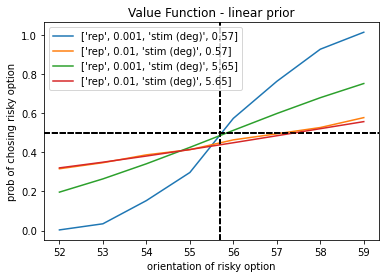

In [206]:
rangeOri = rangeLinear2

sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_list = [0.001, 0.01]

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - linear prior")
        plt.axhline(0.5, c='k', ls='--')
    

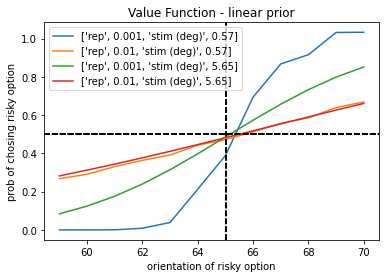

In [207]:
rangeOri = rangeLinear3

sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_list = [0.001, 0.01]

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--') 
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - linear prior")
        plt.axhline(0.5, c='k', ls='--')
    

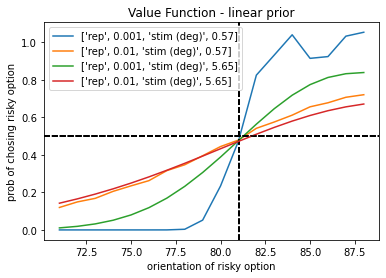

In [208]:
rangeOri = rangeLinear4

sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_list = [0.001, 0.01]

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - linear prior")
        plt.axhline(0.5, c='k', ls='--')
    

In [209]:
# Inverse Linear Prior

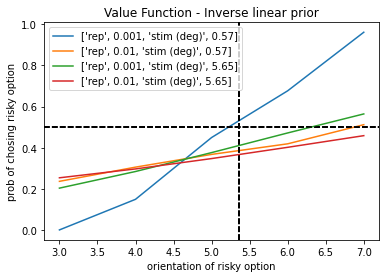

In [212]:
rangeInverseLinear1 = np.linspace(3./180., 7./180., 5)*np.pi
rangeInverseLinear2 = np.linspace(7./180., 14./180., 8)*np.pi
rangeInverseLinear3 = np.linspace(14./180., 26./180., 12)*np.pi
rangeInverseLinear4 = np.linspace(26./180., 43./180., 18)*np.pi

rangeOri = rangeInverseLinear1

sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_list = [0.001, 0.01]
risk_prob = 0.75
type = "inverseLinearPrior"

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - Inverse linear prior")
    
    

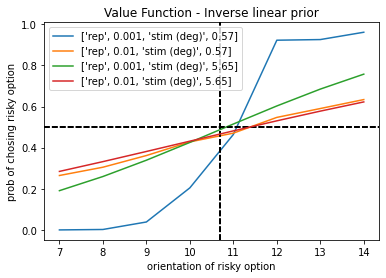

In [213]:
rangeOri = rangeInverseLinear2

sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_list = [0.001, 0.01]
risk_prob = 0.75
type = "inverseLinearPrior"

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - Inverse linear prior")

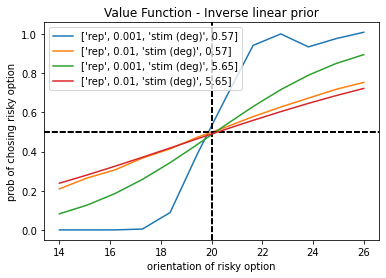

In [214]:
rangeOri = rangeInverseLinear3

sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_list = [0.001, 0.01]
risk_prob = 0.75
type = "inverseLinearPrior"

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - Inverse linear prior")

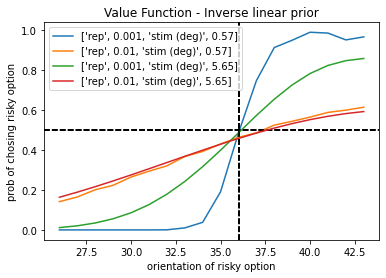

In [215]:
rangeOri = rangeInverseLinear4

sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_list = [0.001, 0.01]
risk_prob = 0.75
type = "inverseLinearPrior"

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - Inverse linear prior")